In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [3]:
#importing the csv file for customer information
wcdf = pd.read_csv('Wholesale Customer.csv')
wcdf.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
 print('Wholesale customers has {} samples with {} features each'.format(*wcdf.shape))

Wholesale customers has 440 samples with 9 features each


In [5]:
#getting information about dataframe
wcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
#checking for any null values in dataset
wcdf.isnull().values.any()

False

In [7]:
wcdf.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
wcdf.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [9]:
wcspend = wcdf[['Region', 'Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
wcspend = wcspend.groupby(['Region', 'Channel']).sum()
wcspend

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

In [103]:
wcspend.sum(axis=1)
#it sums up all row values

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
dtype: int64

1.1. 

Which Region and which Channel seems to spend more?

A.'Other' Region and 'Hotel' Channel spends more.

Which Region and which Channel seems to spend less?

A. 'Opporto' region and 'Hotel' channel spends less

In [18]:
wccorr=wcdf.corr()
wccorr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


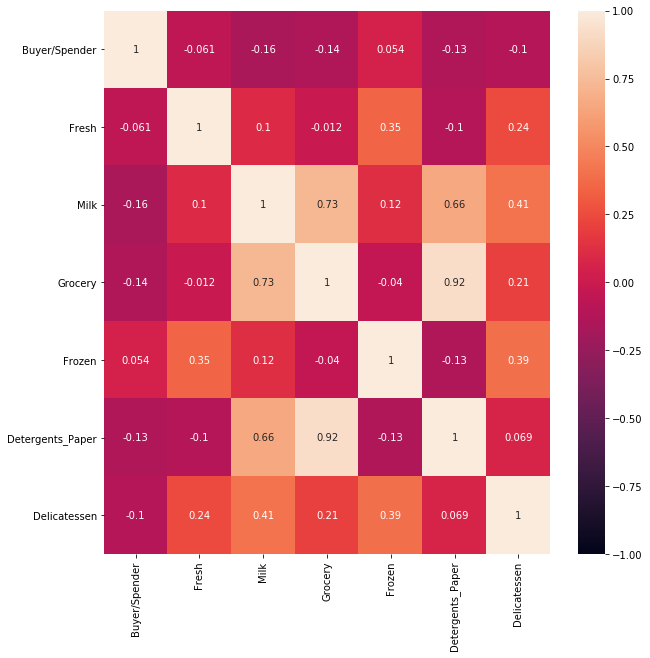

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(wccorr, annot=True, vmin=-1, vmax=1)

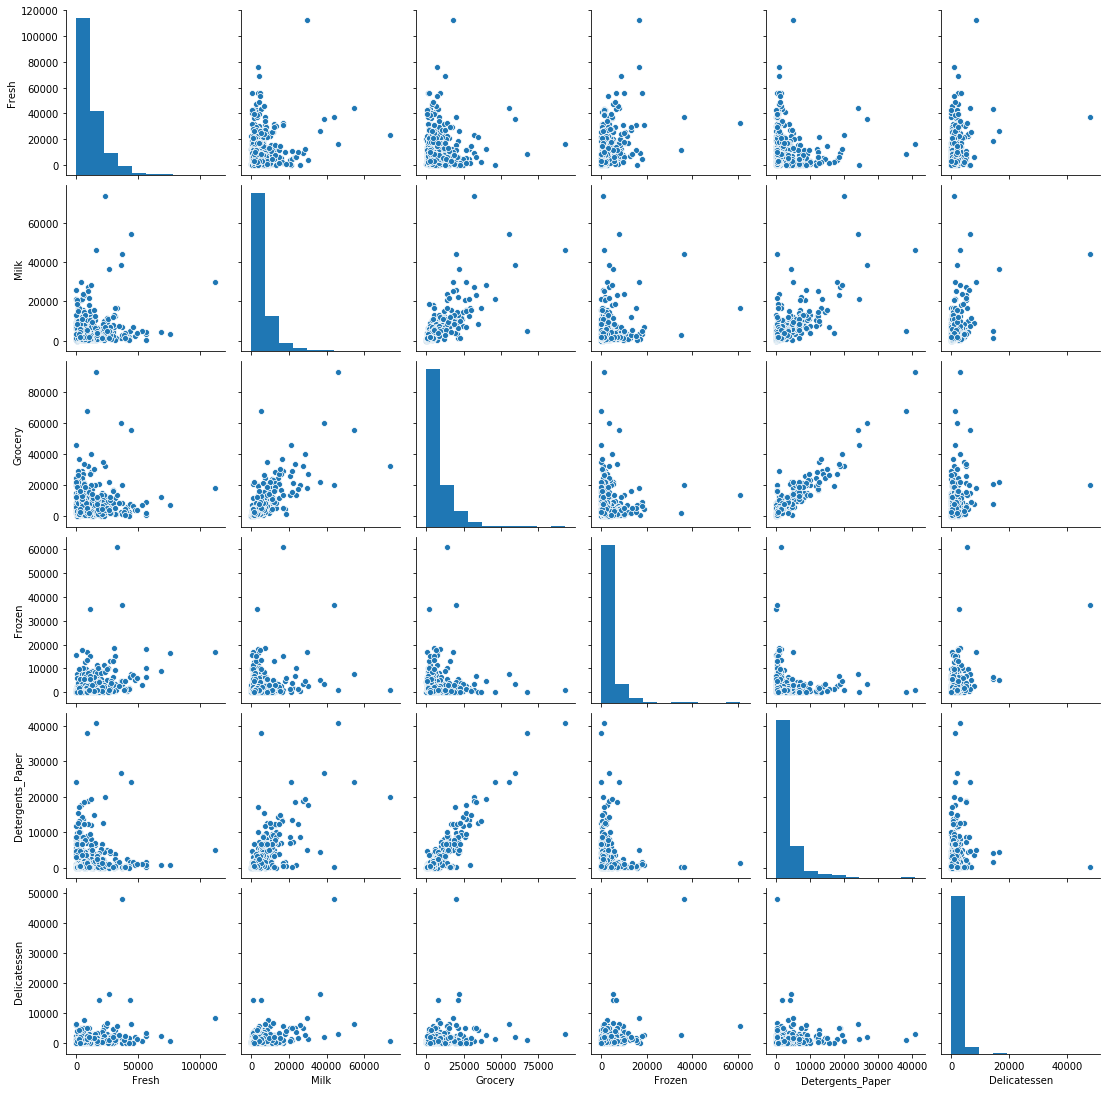

In [20]:
sns.pairplot(wcdf[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']])

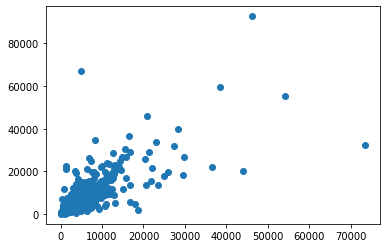

In [21]:
plt.scatter(x=wcdf['Milk'],y=wcdf['Grocery'])
plt.show()

1.3 

Which item shows the most inconsistent behaviour?

Which items shows the least inconsistent behaviour?

In [84]:
wcdfstd = wcdf.std()
wcdfstd

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [85]:
wcdfmn = wcdf.mean()
wcdfmn

Buyer/Spender         220.500000
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [102]:
df3 = pd.concat([wcdfstd, wcdfmn], axis = 1, join='outer')
df3.rename(columns = {0:'std', 1:'mean'}, inplace = True) 
df3['ratio'] = df3['std']/df3['mean']
df3

,std,mean,ratio
Buyer/Spender,127.161315,220.500000,0.576695
Fresh,12647.328865,12000.297727,1.053918
Milk,7380.377175,5796.265909,1.273299
Grocery,9503.162829,7951.277273,1.195174
Frozen,4854.673333,3071.931818,1.580332
Detergents_Paper,4767.854448,2881.493182,1.654647
Delicatessen,2820.105937,1524.870455,1.849407


As we created a dataframe out of std and mean values, we added a 3rd column called 'ratio' which is std/mean. This ratio will provide insights of which variable shows the least inconsistent behaviour.

Ignoring the buyer index column,
The lowest ratio is found for 'Fresh' variable, therefore it has the  least inconsistent behaviour.

In [23]:
wcdf.std().max()

12647.328865076894

'Fresh' shows most inconsistent behaviour

In [24]:
wcdf.std().min()

127.16131487209465

'Buyer/Spender'  shows least inconsistent behaviour

1.4 Below we plot boxplots, to see if there are outliers in the data

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

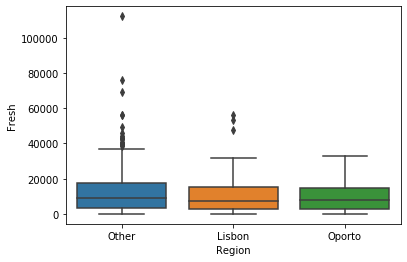

In [25]:
sns.boxplot(wcdf['Region'], wcdf['Fresh'])
plt.xticks(rotation=0)

In [26]:
wcdf.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

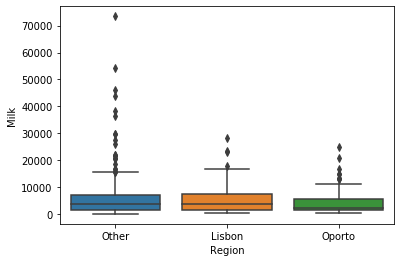

In [27]:
sns.boxplot(wcdf['Region'], wcdf['Milk'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

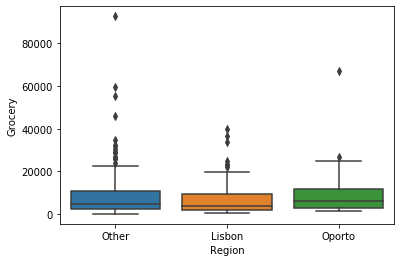

In [28]:
sns.boxplot(wcdf['Region'], wcdf['Grocery'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

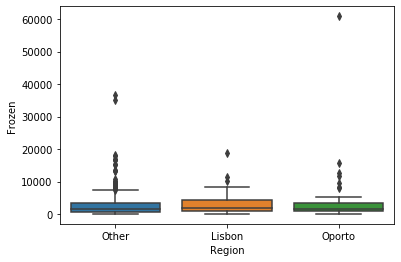

In [29]:
sns.boxplot(wcdf['Region'], wcdf['Frozen'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

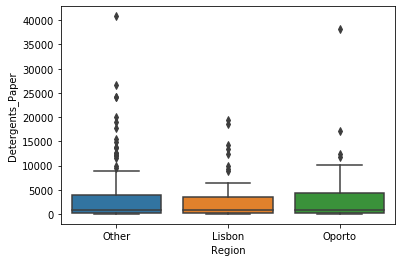

In [30]:
sns.boxplot(wcdf['Region'], wcdf['Detergents_Paper'])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

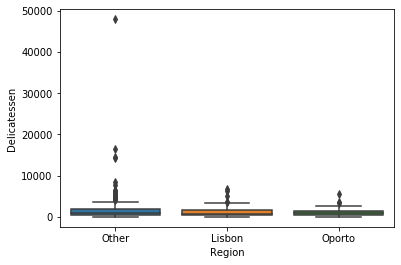

In [31]:
sns.boxplot(wcdf['Region'], wcdf['Delicatessen'])
plt.xticks(rotation=0)

Thus we can see that there are outliers present in 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'


## Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

In [32]:
sdf = pd.read_csv('Survey.csv')
sdf.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [33]:
 print('Survey has {} samples with {} features each'.format(*sdf.shape))

Survey has 62 samples with 14 features each


In [34]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [35]:
sdf.isnull().values.any()

False

In [36]:
sdf.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [37]:
pd.crosstab(sdf['Gender'], sdf['Major'], margins = False) 

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [38]:
pd.crosstab(sdf['Gender'], sdf['Grad Intention'], margins = False)

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [39]:
pd.crosstab(sdf['Gender'], sdf['Employment'], margins = False)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [40]:
pd.crosstab(sdf['Gender'], sdf['Computer'], margins = False)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.

2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
 

2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

In [41]:
sdf['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [42]:
cmsu_probability_male = sdf['Gender'].value_counts()[1]/(sdf['Gender'].value_counts().sum())
cmsu_probability_male

0.46774193548387094

In [43]:
cmsu_probability_female = sdf['Gender'].value_counts()[0]/(sdf['Gender'].value_counts().sum())
cmsu_probability_female

0.532258064516129

In [44]:
majorct = pd.crosstab(sdf['Gender'], sdf['Major'], margins = False) 
majorct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [45]:
p_male_major = majorct.iloc[1,:]/(majorct.iloc[0,:]+majorct.iloc[1,:])
pd.DataFrame(data=p_male_major)

,0
Major,
Accounting,0.571429
CIS,0.250000
Economics/Finance,0.363636
International Business,0.333333
Management,0.600000
Other,0.571429
Retailing/Marketing,0.357143
Undecided,1.000000


In [46]:
p_female_major = majorct.iloc[0,:]/(majorct.iloc[0,:]+majorct.iloc[1,:])
pd.DataFrame(data=p_female_major)

,0
Major,
Accounting,0.428571
CIS,0.750000
Economics/Finance,0.636364
International Business,0.666667
Management,0.400000
Other,0.428571
Retailing/Marketing,0.642857
Undecided,0.000000


In [47]:
gradintct = pd.crosstab(sdf['Gender'], sdf['Grad Intention'], margins = False)
gradintct

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [48]:
p_male = gradintct.iloc[1,2]/(gradintct.iloc[0,2]+gradintct.iloc[1,2])
p_male

0.6071428571428571

In [49]:
p_female = gradintct.iloc[0,2]/(gradintct.iloc[0,2]+gradintct.iloc[1,2])
p_female

0.39285714285714285

Part II

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

## Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:

LaTeX: H_0<=0.35

LaTeX: H_A>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

LaTeX: H_0<=0.35

LaTeX: H_B>0.35

3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

In [50]:
absdf = pd.read_csv('A & B shingles.csv')
absdf.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [51]:
absdf['A'].mean()

0.3166666666666666

So, we can see that the sample mean X_barA is 0.3167

In [52]:
absdf['A'].std()

0.13573082605973166

So, we can see that the sample standard deviation of S_A is 0.1357

In [53]:
absdf['B'].mean()

0.2735483870967742

So, we can see that the sample mean X_barB is 0.2735

In [54]:
absdf['B'].std()

0.13729647694185443

So, we can see that the sample standard deviation of S_B is 0.1372

Population mean of A and B are assumed as 0.35, as given in the hypothesis to analyze

we also have the sample mean of A and B and sample standard deviation of A and B

n_A = 36,   n_B = 31

Given in the problem,

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound (mu_A) per 100 square feet  is given:

H_0<=0.35

H_a>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound (mu_B) per 100 square feet is given:

H_0<=0.35

H_a>0.35

Based on above inputs, We'll go with the t_stat test 

Solving below for A,

In [55]:
X_barA = 0.3167
mu_A = 0.35 
S_A = 0.1357
n_A = 36
tstat_A = (X_barA - mu_A)/(S_A/np.sqrt(n_A))
tstat_A

-1.4723655121591748

Here for A, as tstat_A > -1.69 (critical), we fail to reject null hypothesis, 

therefore mu_A <=0.35, mean of shingles A is equal to 0.35

Solving below for B,

In [56]:
X_barB = 0.2735
mu_B = 0.35 
S_B = 0.1372
n_B = 31
tstat_B = (X_barB - mu_B)/(S_B/np.sqrt(n_B))
tstat_B

-3.1044750273797117

Here for B, as tstat_B < -1.69 (critical), we reject the null hypothesis, 

therefore mu_B > 0.35, mean of shingles B is greater than 0.35

Because  mu_A <=0.35 and mu_B > 0.35, we can conclude that population means for shingles A and B are not equal

We assume that the populations of A and B are simple random samples and approximately normally distributed. Also sample size is sufficiently large, hence sample standard deviation is approximated with population standard deviation.